# Capstone Project Part.2

# Introduction
This projec is used to compare the average house prices in different districts between NYC and Torono and analyze the stores features importance. For example, the coefficient of park numbers is higher than the restaurants.  
I'll try to use the house price predictor in Toronto's house prices.

# Business Problem
For someone who need to live from Toronto west to Toronto east, this project briefly analyze the life function in different boroughs and neighbors. We use the Foursquare the search the stores and place like restaurants, banks and parks. In our study, the Downtown Toronto’s financial business is very flourish and have the best life function. Next step, we use the K-means to cluster these neighbours and divide to the 10 clusters. In these 10 clusters, there are similar life function for who lives. We hope this project can advise you some place you can find the similar one.

# Step:
I will use these stores number around the district as the features and make some clustering to get the similar districts.

Next, I'll try to use these K-mean algorithm to cluster the neighbours to find the similar groups. I hope I can find some similar features by these data science analysis skills.

In [2]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

#!conda install -c conda-forge geopy --yes 
from geopy.geocoders import Nominatim # module to convert an address into latitude and longitude values

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize

#!conda install -c conda-forge folium=0.5.0 --yes
import folium # plotting library

print('Folium installed')
print('Libraries imported.')

TorontoLocData=pd.read_csv("toronto_loc.csv")

Folium installed
Libraries imported.


# Raw data I need.
Toronto GDP https://www.toronto.ca/city-government/data-research-maps/toronto-economy-labour-force-demographics/
NYC GDP https://en.wikipedia.org/wiki/List_of_cities_by_GDP


In [3]:
raw=pd.read_csv("toronto_loc.csv")
Toronto_raw=raw.drop("Unnamed: 0",axis=1)

Toronto_raw

,Postcode,Borough,Neighbourhood,Latitude,Longitude
0,M1B,Scarborough,"Rouge, Malvern",43.806686,-79.194353
1,M1C,Scarborough,"Highland Creek, Rouge Hill, Port Union",43.784535,-79.160497
2,M1E,Scarborough,"Guildwood, Morningside, West Hill",43.763573,-79.188711
3,M1G,Scarborough,Woburn,43.770992,-79.216917
4,M1H,Scarborough,Cedarbrae,43.773136,-79.239476
5,M1J,Scarborough,Scarborough Village,43.744734,-79.239476
6,M1K,Scarborough,"East Birchmount Park, Ionview, Kennedy Park",43.727929,-79.262029
7,M1L,Scarborough,"Clairlea, Golden Mile, Oakridge",43.711112,-79.284577
8,M1M,Scarborough,"Cliffcrest, Cliffside, Scarborough Village West",43.716316,-79.239476
9,M1N,Scarborough,"Birch Cliff, Cliffside West",43.692657,-79.264848


In [4]:
NYC_raw=pd.read_csv("NYC_loc.csv")
CLIENT_ID = 'ZSAAQTHAJNFRQUIQRQVQCTQ1GJLTB3HX1HBDUNA24ZSXZIOZ' # your Foursquare ID
CLIENT_SECRET = '25UDBWH04RTLXEIEWNJGVCSSOJS0INTCNJIDOFZAZHMOOIVU' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

radius = 10000

Your credentails:
CLIENT_ID: ZSAAQTHAJNFRQUIQRQVQCTQ1GJLTB3HX1HBDUNA24ZSXZIOZ
CLIENT_SECRET:25UDBWH04RTLXEIEWNJGVCSSOJS0INTCNJIDOFZAZHMOOIVU


In [7]:
import time
FoodDict={}
search_query = 'food'
radius = 2000
for j in range(len(Toronto_raw)):
    latitude=Toronto_raw[["Latitude","Longitude"]].loc[j][0]
    longitude=Toronto_raw[["Latitude","Longitude"]].loc[j][1]

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    redo=1
    while(redo):
        results = requests.get(url).json()
        if results['meta']['code']!=200:
            redo=1
        else:
            print("Server Error")
            print(j)
            redo=0

    fild=pd.DataFrame(results['response']['venues'])
    regionNum=[]
    shopName=[]
    for i in range(len(fild)):
        if len(fild['categories'][i])!=0:
            regionNum.append(fild['categories'][i][0]['name'].upper())
            shopName.append(fild['name'][i].upper())
    FoodDict[Toronto_raw["Postcode"].loc[j]]=[regionNum,shopName]

ParkDict={}
search_query = 'park'
for j in range(len(Toronto_raw)):
    latitude=Toronto_raw[["Latitude","Longitude"]].loc[j][0]
    longitude=Toronto_raw[["Latitude","Longitude"]].loc[j][1]

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    redo=1
    while(redo):
        results = requests.get(url).json()
        if results['meta']['code']!=200:
            redo=1
        else:
            print("Server Error")
            print(j)
            redo=0

    fild=pd.DataFrame(results['response']['venues'])
    regionNum=[]
    shopName=[]
    for i in range(len(fild)):
        if len(fild['categories'][i])!=0:
            regionNum.append(fild['categories'][i][0]['name'].upper())
            shopName.append(fild['name'][i].upper())
    ParkDict[Toronto_raw["Postcode"].loc[j]]=[regionNum,shopName]

BankDict={}
search_query = 'bank'
for j in range(len(Toronto_raw)):
    latitude=Toronto_raw[["Latitude","Longitude"]].loc[j][0]
    longitude=Toronto_raw[["Latitude","Longitude"]].loc[j][1]

    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    redo=1
    while(redo):
        results = requests.get(url).json()
        if results['meta']['code']!=200:
            redo=1
        else:
            print("Server Error")
            print(j)
            redo=0

    fild=pd.DataFrame(results['response']['venues'])
    regionNum=[]
    shopName=[]
    for i in range(len(fild)):
        if len(fild['categories'][i])!=0:
            regionNum.append(fild['categories'][i][0]['name'].upper())
            shopName.append(fild['name'][i].upper())
    BankDict[Toronto_raw["Postcode"].loc[j]]=[regionNum,shopName]

numerCount=[]

for i in BankDict.keys():
    numerCount.append([i,pd.Series(FoodDict[i][0]).count(),pd.Series(BankDict[i][0]).count(),pd.Series(ParkDict[i][0]).count()])

numerCount

Server Error
0
Server Error
1
Server Error
2
Server Error
3
Server Error
4
Server Error
5
Server Error
6
Server Error
7
Server Error
8
Server Error
9
Server Error
10
Server Error
11
Server Error
12
Server Error
13
Server Error
14
Server Error
15
Server Error
16
Server Error
17
Server Error
18
Server Error
19
Server Error
20
Server Error
21
Server Error
22
Server Error
23
Server Error
24
Server Error
25
Server Error
26
Server Error
27
Server Error
28
Server Error
29
Server Error
30
Server Error
31
Server Error
32
Server Error
33
Server Error
34
Server Error
35
Server Error
36
Server Error
37
Server Error
38
Server Error
39
Server Error
40
Server Error
41
Server Error
42
Server Error
43
Server Error
44
Server Error
45
Server Error
46
Server Error
47
Server Error
48
Server Error
49
Server Error
50
Server Error
51
Server Error
52
Server Error
53
Server Error
54
Server Error
55
Server Error
56
Server Error
57
Server Error
58
Server Error
59
Server Error
60
Server Error
61
Server Error
62
Se

[['M1B', 4, 1, 24],
 ['M1C', 4, 4, 29],
 ['M1E', 9, 4, 26],
 ['M1G', 11, 8, 30],
 ['M1H', 21, 19, 30],
 ['M1J', 11, 9, 29],
 ['M1K', 10, 9, 29],
 ['M1L', 19, 11, 30],
 ['M1M', 3, 6, 29],
 ['M1N', 11, 6, 29],
 ['M1P', 11, 4, 29],
 ['M1R', 23, 11, 30],
 ['M1S', 25, 17, 30],
 ['M1T', 20, 14, 29],
 ['M1V', 28, 12, 29],
 ['M1W', 22, 8, 30],
 ['M1X', 0, 0, 8],
 ['M2H', 8, 7, 27],
 ['M2J', 16, 12, 29],
 ['M2K', 4, 5, 28],
 ['M2L', 15, 7, 27],
 ['M2M', 22, 12, 29],
 ['M2N', 23, 21, 29],
 ['M2P', 18, 14, 29],
 ['M2R', 15, 14, 30],
 ['M3A', 16, 6, 30],
 ['M3B', 11, 8, 28],
 ['M3C', 7, 7, 30],
 ['M3H', 7, 4, 28],
 ['M3J', 22, 4, 27],
 ['M3K', 16, 4, 26],
 ['M3L', 11, 5, 27],
 ['M3M', 6, 5, 29],
 ['M3N', 21, 8, 23],
 ['M4A', 23, 13, 30],
 ['M4B', 21, 15, 29],
 ['M4C', 26, 21, 28],
 ['M4E', 29, 21, 29],
 ['M4G', 14, 18, 29],
 ['M4H', 14, 13, 29],
 ['M4J', 28, 20, 27],
 ['M4K', 28, 16, 29],
 ['M4L', 28, 18, 28],
 ['M4M', 29, 19, 30],
 ['M4N', 12, 10, 30],
 ['M4P', 25, 25, 30],
 ['M4R', 27, 22, 30],


In [8]:
totalList=[]

for i in FoodDict.keys():
    totalList=totalList+FoodDict[i][0]
count=pd.Series(totalList).value_counts()
count

GROCERY STORE                    290
FOOD COURT                       234
FOOD TRUCK                       109
FOOD & DRINK SHOP                102
CHINESE RESTAURANT               100
CONVENIENCE STORE                 95
SUPERMARKET                       77
RESTAURANT                        59
CARIBBEAN RESTAURANT              58
FAST FOOD RESTAURANT              53
DELI / BODEGA                     52
PET STORE                         44
OFFICE                            36
ASIAN RESTAURANT                  34
MISCELLANEOUS SHOP                32
GOURMET SHOP                      27
SALAD PLACE                       26
MIDDLE EASTERN RESTAURANT         24
INDIAN RESTAURANT                 23
FILIPINO RESTAURANT               19
HEALTH FOOD STORE                 18
VEGETARIAN / VEGAN RESTAURANT     18
MEDITERRANEAN RESTAURANT          17
COLLEGE CAFETERIA                 17
MARKET                            16
BUILDING                          16
FACTORY                           16
C

In [12]:
numerCount=[]

for i in BankDict.keys():
    numerCount.append([i,pd.Series(FoodDict[i][0]).count(),pd.Series(BankDict[i][0]).count(),pd.Series(ParkDict[i][0]).count()])

structureData=pd.DataFrame(numerCount,columns=['Postcode','Food','Bank','Park'])
structureData.index=structureData['Postcode']
structureData.to_csv("structureData.csv")
structureData

,Postcode,Food,Bank,Park
Postcode,,,,
M1B,M1B,4,1,24
M1C,M1C,4,4,29
M1E,M1E,9,4,26
M1G,M1G,11,8,30
M1H,M1H,21,19,30
M1J,M1J,11,9,29
M1K,M1K,10,9,29
M1L,M1L,19,11,30
M1M,M1M,3,6,29


In [10]:
boroughGroup=list(Toronto_raw.groupby("Borough"))
boroughList=[]
for i in range(len(boroughGroup)):
    boroughList.append([boroughGroup[i][0],structureData.loc[boroughGroup[i][1].iloc[:,0]].sum()['Food'],structureData.loc[boroughGroup[i][1].iloc[:,0]].sum()['Bank'],structureData.loc[boroughGroup[i][1].iloc[:,0]].sum()['Park']])
boroughList=pd.DataFrame(boroughList,columns=['Borough','Food','Bank','Park'])

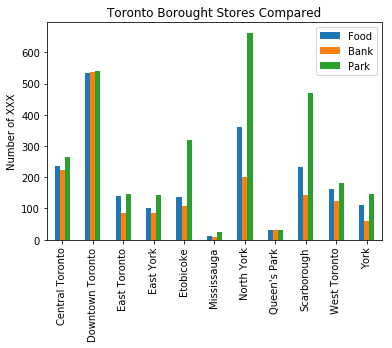

In [41]:
fig=boroughList.plot(kind="bar")
fig.set_xticklabels(boroughList['Borough']);
fig.set_ylabel('Number of XXX');
fig.set_title('Toronto Borought Stores Compared');

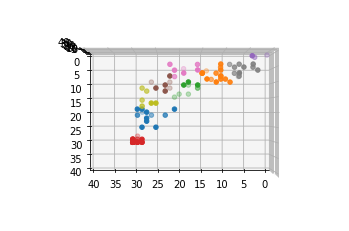

In [163]:
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
import matplotlib.pyplot as plt
X_data=np.array(structureData.iloc[:,1:])
# for i in range(8)+2:
j=9
reduced_data = PCA(n_components=2).fit_transform(X_data)
kmeans = KMeans(init='k-means++', n_clusters=j, n_init=10)
kmeans.fit(reduced_data)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
result=model.predict(reduced_data)
for i in range(j):
    curr=X_data[result==i]
    ax.scatter(curr[:,0], curr[:,1], curr[:,2])
ax.set_xlim((0,40))
ax.set_ylim((0,40))
ax.set_zlim((0,40))
ax.view_init(90, 90)

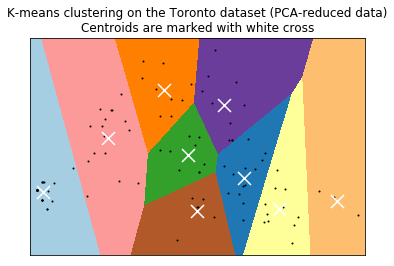

In [164]:
from sklearn.decomposition import PCA


h = .02

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('K-means clustering on the Toronto dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

In [165]:
city_cluster=[]
for i in range(j):
    data=structureData.iloc[:,0][result==i].reset_index(drop=True)
    city_cluster.append(data)
    print("Cluster "+str(i+1))
    print(list(data))
    print()

Cluster 1
['M1H', 'M2N', 'M4C', 'M4E', 'M4J', 'M4M', 'M4P', 'M4R', 'M5N', 'M6H', 'M6K', 'M6P']

Cluster 2
['M1G', 'M1J', 'M1K', 'M1N', 'M1P', 'M2L', 'M3B', 'M3L', 'M4N', 'M5M', 'M6L', 'M7R', 'M8V', 'M9M', 'M9P', 'M9V']

Cluster 3
['M1L', 'M1T', 'M2J', 'M2P', 'M4B', 'M6B', 'M8W', 'M8Z', 'M9N']

Cluster 4
['M4S', 'M4T', 'M4V', 'M4W', 'M4X', 'M4Y', 'M5A', 'M5B', 'M5C', 'M5E', 'M5G', 'M5H', 'M5J', 'M5K', 'M5L', 'M5P', 'M5R', 'M5S', 'M5T', 'M5V', 'M5W', 'M5X', 'M6G', 'M6J', 'M7A']

Cluster 5
['M1B', 'M1X', 'M9W']

Cluster 6
['M1R', 'M1W', 'M2M', 'M4A', 'M6N', 'M6S', 'M7Y']

Cluster 7
['M3A', 'M3J', 'M3K', 'M3N', 'M6A', 'M6M', 'M9L']

Cluster 8
['M1C', 'M1E', 'M1M', 'M2H', 'M2K', 'M3C', 'M3H', 'M3M', 'M9A', 'M9C', 'M9R']

Cluster 9
['M1S', 'M1V', 'M4K', 'M4L', 'M6C', 'M6E', 'M6R']



In [11]:
toronto_neighbor=pd.read_csv('Toronto_neighbor.csv')
key="rexd"
def neighborIndex(x):
    key2=key
    return x.find(key2)
Toronto_raw['Neighbourhood'][pd.Series(Toronto_raw['Neighbourhood']).apply(neighborIndex)>0]

Series([], Name: Neighbourhood, dtype: object)

In [307]:
key="Okanagan".upper()
def neighborIndex(x):
    key2=key
    return x.find(key2)
toronto_neighbor[toronto_neighbor["Neighbourhood"].str.upper().str.find(key)>=0]

,Unnamed: 0,Postcode,Borough,Neighbourhood


0     -1
1     -1
2     -1
3     -1
4     -1
5     -1
6     -1
7     -1
8     -1
9     -1
10    -1
11    -1
12    -1
13    -1
14    -1
15    -1
16    -1
17    -1
18    -1
19    -1
20    -1
21    -1
22    -1
23    -1
24    -1
25    -1
26    -1
27    -1
28    -1
29    -1
      ..
181   -1
182   -1
183   -1
184   -1
185   -1
186   -1
187   -1
188   -1
189   -1
190   -1
191   -1
192   -1
193   -1
194   -1
195   -1
196   -1
197   -1
198   -1
199   -1
200   -1
201   -1
202   -1
203   -1
204   -1
205   -1
206   -1
207   -1
208   -1
209   -1
210   -1
Name: Neighbourhood, Length: 211, dtype: int64